In [4]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime as dt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import math
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas import Grouper
from pandas.plotting import lag_plot
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import pmdarima as pm

In [5]:

# Importing the training set
dataset_2014 = pd.read_csv('Datasets/data.csv')

#Quarter 1
dataset_2015_Q1 = pd.read_csv('Datasets/quarter1/Divvy_Trips_2015_Q1.csv')
dataset_2016_Q1 = pd.read_csv('Datasets/quarter1/Divvy_Trips_2016_Q1.csv')
dataset_2017_Q1 = pd.read_csv('Datasets/quarter1/Divvy_Trips_2017_Q1.csv')
dataset_2018_Q1 = pd.read_csv('Datasets/quarter1/Divvy_Trips_2018_Q1.csv')

#Quarter 2 
dataset_2015_Q2 = pd.read_csv('Datasets/quarter2/Divvy_Trips_2015_Q2.csv')
dataset_2016_04  = pd.read_csv('Datasets/quarter2/Divvy_Trips_2016_04.csv')
dataset_2016_05  = pd.read_csv('Datasets/quarter2/Divvy_Trips_2016_05.csv')
dataset_2016_06  = pd.read_csv('Datasets/quarter2/Divvy_Trips_2016_06.csv')
dataset_2016_Q2 = pd.concat([dataset_2016_04, dataset_2016_05, dataset_2016_06])
dataset_2017_Q2 = pd.read_csv('Datasets/quarter2/Divvy_Trips_2017_Q2.csv')
dataset_2018_Q2 = pd.read_csv('Datasets/quarter2/Divvy_Trips_2018_Q2.csv')

#Quarter 3 
dataset_2015_07  = pd.read_csv('Datasets/quarter3/Divvy_Trips_2015_07.csv')
dataset_2015_08  = pd.read_csv('Datasets/quarter3/Divvy_Trips_2015_08.csv')
dataset_2015_09  = pd.read_csv('Datasets/quarter3/Divvy_Trips_2015_09.csv')
dataset_2015_Q3 = pd.concat([dataset_2015_07, dataset_2015_08, dataset_2015_09])
dataset_2016_Q3 = pd.read_csv('Datasets/quarter3/Divvy_Trips_2016_Q3.csv')
dataset_2017_Q3 = pd.read_csv('Datasets/quarter3/Divvy_Trips_2017_Q3.csv')
dataset_2018_Q3 = pd.read_csv('Datasets/quarter3/Divvy_Trips_2018_Q3.csv')

#Quarter 4 
dataset_2015_Q4 = pd.read_csv('Datasets/quarter4/Divvy_Trips_2015_Q4.csv')
dataset_2016_Q4 = pd.read_csv('Datasets/quarter4/Divvy_Trips_2016_Q4.csv')
dataset_2017_Q4 = pd.read_csv('Datasets/quarter4/Divvy_Trips_2017_Q4.csv')
dataset_2018_Q4 = pd.read_csv('Datasets/quarter4/Divvy_Trips_2018_Q4.csv')



In [6]:
dataset_2014['starttime'] = pd.to_datetime(dataset_2014['starttime'],infer_datetime_format=True)
dataset_2014['stoptime'] = pd.to_datetime(dataset_2014['stoptime'],infer_datetime_format=True)

#Quarter 1
dataset_2015_Q1['starttime'] = pd.to_datetime(dataset_2015_Q1['starttime'],infer_datetime_format=True)
dataset_2015_Q1['stoptime'] = pd.to_datetime(dataset_2015_Q1['stoptime'],infer_datetime_format=True)

dataset_2016_Q1['starttime'] = pd.to_datetime(dataset_2016_Q1['starttime'],infer_datetime_format=True)
dataset_2016_Q1['stoptime'] = pd.to_datetime(dataset_2016_Q1['stoptime'],infer_datetime_format=True)

dataset_2017_Q1['starttime'] = pd.to_datetime(dataset_2017_Q1['starttime'],infer_datetime_format=True)
dataset_2017_Q1['stoptime'] = pd.to_datetime(dataset_2017_Q1['stoptime'],infer_datetime_format=True)

dataset_2018_Q1['starttime'] = pd.to_datetime(dataset_2018_Q1['starttime'],infer_datetime_format=True)
dataset_2018_Q1['stoptime'] = pd.to_datetime(dataset_2018_Q1['stoptime'],infer_datetime_format=True)

#Quarter 2
dataset_2015_Q2['starttime'] = pd.to_datetime(dataset_2015_Q2['starttime'],infer_datetime_format=True)
dataset_2015_Q2['stoptime']  = pd.to_datetime(dataset_2015_Q2['stoptime'],infer_datetime_format=True)

dataset_2016_Q2['starttime'] = pd.to_datetime(dataset_2016_Q2['starttime'],infer_datetime_format=True)
dataset_2016_Q2['stoptime']  = pd.to_datetime(dataset_2016_Q2['stoptime'],infer_datetime_format=True)

dataset_2017_Q2['starttime'] = pd.to_datetime(dataset_2017_Q2['starttime'],infer_datetime_format=True)
dataset_2017_Q2['stoptime']  = pd.to_datetime(dataset_2017_Q2['stoptime'],infer_datetime_format=True)

dataset_2018_Q2['starttime'] = pd.to_datetime(dataset_2018_Q2['starttime'],infer_datetime_format=True)
dataset_2018_Q2['stoptime']  = pd.to_datetime(dataset_2018_Q2['stoptime'],infer_datetime_format=True)

#Quarter 3
dataset_2015_Q3['starttime'] = pd.to_datetime(dataset_2015_Q3['starttime'],infer_datetime_format=True)
dataset_2015_Q3['stoptime']  = pd.to_datetime(dataset_2015_Q3['stoptime'],infer_datetime_format=True)

dataset_2016_Q3['starttime'] = pd.to_datetime(dataset_2016_Q3['starttime'],infer_datetime_format=True)
dataset_2016_Q3['stoptime']  = pd.to_datetime(dataset_2016_Q3['stoptime'],infer_datetime_format=True)

dataset_2017_Q3['starttime'] = pd.to_datetime(dataset_2017_Q3['starttime'],infer_datetime_format=True)
dataset_2017_Q3['stoptime']  = pd.to_datetime(dataset_2017_Q3['stoptime'],infer_datetime_format=True)

dataset_2018_Q3['starttime'] = pd.to_datetime(dataset_2018_Q3['starttime'],infer_datetime_format=True)
dataset_2018_Q3['stoptime']  = pd.to_datetime(dataset_2018_Q3['stoptime'],infer_datetime_format=True)

#Quarter 4
dataset_2015_Q4['starttime'] = pd.to_datetime(dataset_2015_Q4['starttime'],infer_datetime_format=True)
dataset_2015_Q4['stoptime']  = pd.to_datetime(dataset_2015_Q4['stoptime'],infer_datetime_format=True)

dataset_2016_Q4['starttime'] = pd.to_datetime(dataset_2016_Q4['starttime'],infer_datetime_format=True)
dataset_2016_Q4['stoptime']  = pd.to_datetime(dataset_2016_Q4['stoptime'],infer_datetime_format=True)

dataset_2017_Q4['starttime'] = pd.to_datetime(dataset_2017_Q4['starttime'],infer_datetime_format=True)
dataset_2017_Q4['stoptime']  = pd.to_datetime(dataset_2017_Q4['stoptime'],infer_datetime_format=True)

dataset_2018_Q4['starttime'] = pd.to_datetime(dataset_2018_Q4['starttime'],infer_datetime_format=True)
dataset_2018_Q4['stoptime']  = pd.to_datetime(dataset_2018_Q4['stoptime'],infer_datetime_format=True)

In [7]:
#Filter by Popular Station
filtereddata_2014 = dataset_2014[(dataset_2014.from_station_id==91)]
#Quarter 1 
filtereddata_2014_Q1 = filtereddata_2014[(filtereddata_2014['starttime'].dt.month<=3)]
filtereddata_2015_Q1 = dataset_2015_Q1[(dataset_2015_Q1.from_station_id==91)]
filtereddata_2016_Q1 = dataset_2016_Q1[(dataset_2016_Q1.from_station_id==91)]
filtereddata_2017_Q1 = dataset_2017_Q1[(dataset_2017_Q1.from_station_id==91)]
filtereddata_2018_Q1 = dataset_2018_Q1[(dataset_2018_Q1.from_station_id==91)]

#Quarter 2 
filtereddata_2014_Q2 = filtereddata_2014[(filtereddata_2014['starttime'].dt.month>3) & (filtereddata_2014['starttime'].dt.month<=6)]
filtereddata_2015_Q2 = dataset_2015_Q2[(dataset_2015_Q2.from_station_id==35)]
filtereddata_2016_Q2 = dataset_2016_Q2[(dataset_2016_Q2.from_station_id==35)]
filtereddata_2017_Q2 = dataset_2017_Q2[(dataset_2017_Q2.from_station_id==35)]
filtereddata_2018_Q2 = dataset_2018_Q2[(dataset_2018_Q2.from_station_id==35)]
#Quarter 3 
filtereddata_2014_Q3 = filtereddata_2014[(filtereddata_2014['starttime'].dt.month>6) & (filtereddata_2014['starttime'].dt.month<=9)]
filtereddata_2015_Q3 = dataset_2015_Q3[(dataset_2015_Q3.from_station_id==35)]
filtereddata_2016_Q3 = dataset_2016_Q3[(dataset_2016_Q3.from_station_id==35)]
filtereddata_2017_Q3 = dataset_2017_Q3[(dataset_2017_Q3.from_station_id==35)]
filtereddata_2018_Q3 = dataset_2018_Q3[(dataset_2018_Q3.from_station_id==35)]
#Quarter 4 
filtereddata_2015_Q4 = dataset_2015_Q4[(dataset_2015_Q4.from_station_id==91)]
filtereddata_2016_Q4 = dataset_2016_Q4[(dataset_2016_Q4.from_station_id==91)]
filtereddata_2017_Q4 = dataset_2017_Q4[(dataset_2017_Q4.from_station_id==91)]
filtereddata_2018_Q4 = dataset_2018_Q4[(dataset_2018_Q4.from_station_id==91)]

In [21]:
#Test stationarity 
def teststationarity(timeseries): 
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=30,center=False).mean() 
    rolstd = timeseries.rolling(window=30,center=False).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['checkout'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

# Arima model, Accuracy metric , log function to make stationary, Auto Arima

In [67]:
# Build Model
def modelARIMA(train,test,p,q,d):
    model = ARIMA(train, order=(p,q,d))  
    #model = ARIMA(train, order=(1, 1, 1))  
    fitted = model.fit(disp=-1)  
    print(fitted.summary())
    # Forecast
    fc, se, conf = fitted.forecast(test.shape[0], alpha=2)  # 95% conf
    
    # Make as pandas series
    fc_series = pd.Series(fc, index=test.index)
    lower_series = pd.Series(conf[:, 0], index=test.index)
    upper_series = pd.Series(conf[:, 1], index=test.index)

    # Plot
    plt.figure(figsize=(12,5), dpi=100)
    plt.plot(train, label='training')
    plt.plot(test, label='actual')
    plt.plot(fc_series, label='forecast')
    plt.fill_between(lower_series.index, lower_series, upper_series, 
                     color='k', alpha=.15)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()
    return fc,fc_series
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    print("actual shape:",forecast.shape,actual.shape)
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})
def logfunction(df):
    ts_log = np.log(df)
    #plt.plot(ts_log)
    ts_smooth = ts_log.rolling(window = 7).mean()
    plt.plot(ts_smooth, color = 'red')
    plt.plot(ts_log)
    plt.show()
    # Case 1: No subtraction
    no_sub_ts = ts_smooth
    no_sub_ts.dropna(inplace = True)

    # Case 2: Yes subtraction
    final_sub_ts = ts_log - ts_smooth
    final_sub_ts.dropna(inplace = True)
    return final_sub_ts


# Group by Day

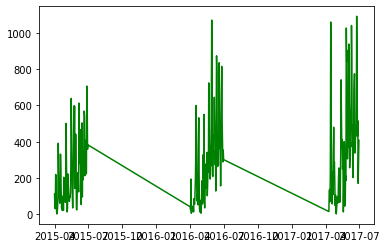

In [48]:

spring = pd.concat([filtereddata_2015_Q2,filtereddata_2016_Q2,filtereddata_2017_Q2])
traindata_spring = pd.concat([filtereddata_2015_Q2,filtereddata_2016_Q2])
testdata_spring  = filtereddata_2017_Q2
spring_1516  = pd.DataFrame(spring.groupby(spring['starttime'].dt.date).count()['trip_id'])
sc1 = pd.DataFrame(traindata_spring.groupby(traindata_spring['starttime'].dt.date).count()['trip_id'])
sc2 = pd.DataFrame(testdata_spring.groupby(testdata_spring['starttime'].dt.date).count()['trip_id'])
spring_1516.columns = ["checkout"]
sc1.columns = ["checkout"]
sc2.columns= ["checkout"]
plt.plot(spring_1516.index,spring_1516.checkout,color='green')
#plt.plot(sc1.index,sc1.checkout,color='blue')
#plt.plot(sc2.index,sc2.checkout,color='red')

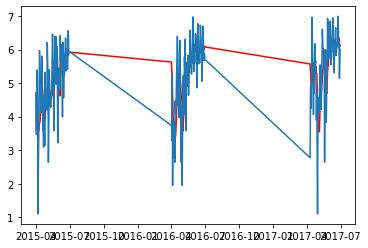

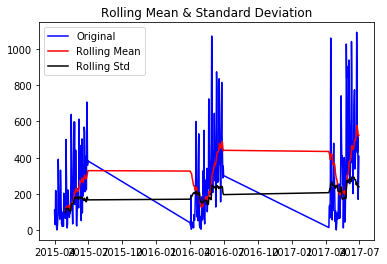

Results of Dickey-Fuller Test:
Test Statistic                  -2.921975
p-value                          0.042852
#Lags Used                       7.000000
Number of Observations Used    256.000000
Critical Value (1%)             -3.456155
Critical Value (5%)             -2.872897
Critical Value (10%)            -2.572822
dtype: float64


In [28]:
spring_1516_sub_ts = logfunction(spring_1516)
# Perform Dickey-Fuller on both
teststationarity(spring_1516)
#teststationarity(spring_1516_sub_ts)

In [44]:
ss = np.unique(filtereddata_2017_Q2['starttime'].dt.date)
ss.shape

(82,)

In [37]:
spring_1516  = pd.DataFrame(spring.groupby(spring['starttime'].dt.date).count()['trip_id'])
dat

,trip_id
starttime,
2015-04-01,112
2015-04-02,36
2015-04-03,32
2015-04-04,220
2015-04-05,217
...,...
2017-06-26,429
2017-06-27,516
2017-06-28,171


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:             D.checkout   No. Observations:                  199
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1305.343
Method:                       css-mle   S.D. of innovations            170.247
Date:                Tue, 26 Nov 2019   AIC                           2622.686
Time:                        20:46:37   BIC                           2642.446
Sample:                             1   HQIC                          2630.683
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.7085      2.323      0.305      0.761      -3.844       5.261
ar.L1.D.checkout     0.9667      0.146      6.630      0.000       0.681       1.252
ar.L2.D.checkout    -0.4746 

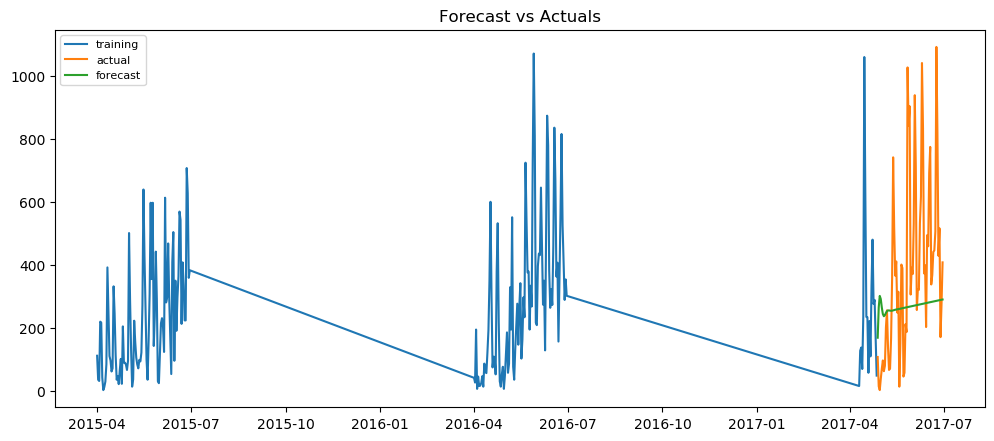

Fit ARIMA: order=(1, 1, 1); AIC=3506.583, BIC=3520.872, Fit time=0.265 seconds
Fit ARIMA: order=(0, 1, 0); AIC=3566.869, BIC=3574.013, Fit time=0.006 seconds
Fit ARIMA: order=(1, 1, 0); AIC=3565.625, BIC=3576.342, Fit time=0.054 seconds
Fit ARIMA: order=(0, 1, 1); AIC=3561.580, BIC=3572.296, Fit time=0.090 seconds
Fit ARIMA: order=(2, 1, 1); AIC=3499.897, BIC=3517.758, Fit time=0.314 seconds
Fit ARIMA: order=(2, 1, 0); AIC=3555.490, BIC=3569.779, Fit time=0.177 seconds
Fit ARIMA: order=(2, 1, 2); AIC=3494.628, BIC=3516.061, Fit time=0.393 seconds
Fit ARIMA: order=(3, 1, 3); AIC=3477.500, BIC=3506.077, Fit time=1.079 seconds
Fit ARIMA: order=(2, 1, 3); AIC=3484.509, BIC=3509.514, Fit time=0.526 seconds
Fit ARIMA: order=(3, 1, 2); AIC=3494.869, BIC=3519.874, Fit time=0.399 seconds
Total fit time: 3.316 seconds
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  263
Model:                

In [53]:
# Create Training and Test
train = spring_1516[:200]
test = spring_1516[200:]
fc,fc_series = modelARIMA(train,test,2,1,2)
auto_arima(spring_1516)

# Group by Hour 

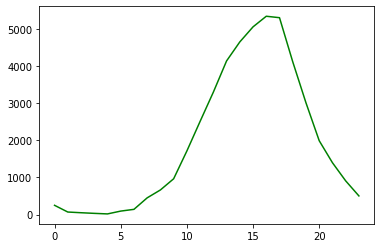

In [12]:

spring = pd.concat([filtereddata_2015_Q2,filtereddata_2016_Q2])
traindata_spring = pd.concat([filtereddata_2015_Q2])
testdata_spring  = filtereddata_2016_Q2
spring_1516_hour  = pd.DataFrame(spring.groupby(spring['starttime'].dt.hour).count()['trip_id'])
sc1 = pd.DataFrame(traindata_spring.groupby(traindata_spring['starttime'].dt.hour).count()['trip_id'])
sc2 = pd.DataFrame(testdata_spring.groupby(testdata_spring['starttime'].dt.hour).count()['trip_id'])
spring_1516_hour.columns = ["checkout"]
sc1.columns = ["checkout"]
sc2.columns= ["checkout"]
plt.plot(spring_1516_hour.index,spring_1516_hour.checkout,color='green')
#plt.plot(sc1.index,sc1.checkout,color='blue')
#plt.plot(sc2.index,sc2.checkout,color='red')


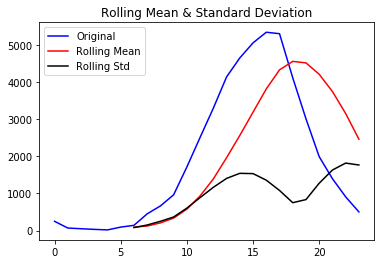

Results of Dickey-Fuller Test:
Test Statistic                  0.642516
p-value                         0.988618
#Lags Used                      8.000000
Number of Observations Used    15.000000
Critical Value (1%)            -3.964443
Critical Value (5%)            -3.084908
Critical Value (10%)           -2.681814
dtype: float64


In [13]:
teststationarity(spring_1516_hour)

# Having june month, predict july month for year 2015

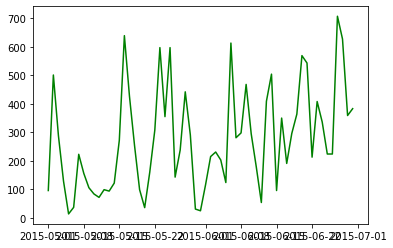

In [24]:
may_june = filtereddata_2015_Q2[(filtereddata_2015_Q2['starttime'].dt.month==5) | (filtereddata_2015_Q2['starttime'].dt.month==6)]
may_2015 = filtereddata_2015_Q2[(filtereddata_2015_Q2['starttime'].dt.month==5)]
june_2015  = filtereddata_2015_Q2[(filtereddata_2015_Q2['starttime'].dt.month==6)]
may_june_date  = pd.DataFrame(may_june.groupby(may_june['starttime'].dt.date).count()['trip_id'])
#may_2015_date = pd.DataFrame(may_2015.groupby(may_2015['starttime'].dt.date).count()['trip_id'])
#june_2015_date = pd.DataFrame(june_2015.groupby(june_2015['starttime'].dt.date).count()['trip_id'])
may_june_date.columns = ["checkout"]
may_2015_date.columns = ["checkout"]
june_2015_date.columns= ["checkout"]
plt.plot(may_june_date.index,may_june_date.checkout,color='green')
#plt.plot(sc1.index,sc1.checkout,color='blue')
#plt.plot(sc2.index,sc2.checkout,color='red')


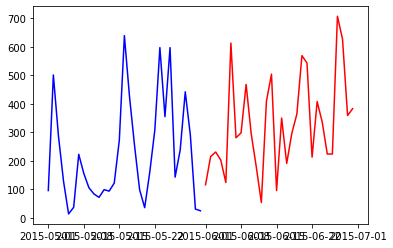

In [15]:
plt.plot(may_2015_date.index,may_2015_date.checkout,color='blue')
plt.plot(june_2015_date.index,june_2015_date.checkout,color='red')

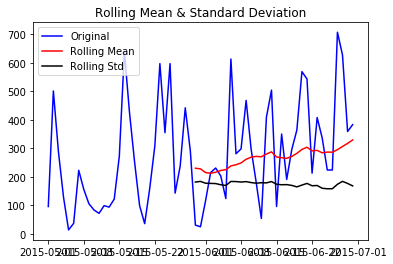

Results of Dickey-Fuller Test:
Test Statistic                 -5.275166
p-value                         0.000006
#Lags Used                      0.000000
Number of Observations Used    60.000000
Critical Value (1%)            -3.544369
Critical Value (5%)            -2.911073
Critical Value (10%)           -2.593190
dtype: float64


(31, 1)

In [25]:
teststationarity(may_june_date)
may_2015_date.shape

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:             D.checkout   No. Observations:                   30
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -197.037
Method:                       css-mle   S.D. of innovations            165.104
Date:                Tue, 26 Nov 2019   AIC                            402.074
Time:                        21:06:24   BIC                            407.679
Sample:                    05-02-2015   HQIC                           403.867
                         - 05-31-2015                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.1731      5.503      0.577      0.569      -7.612      13.958
ar.L1.D.checkout     0.4369      0.179      2.442      0.021       0.086       0.788
ma.L1.D.checkout    -0.9999 

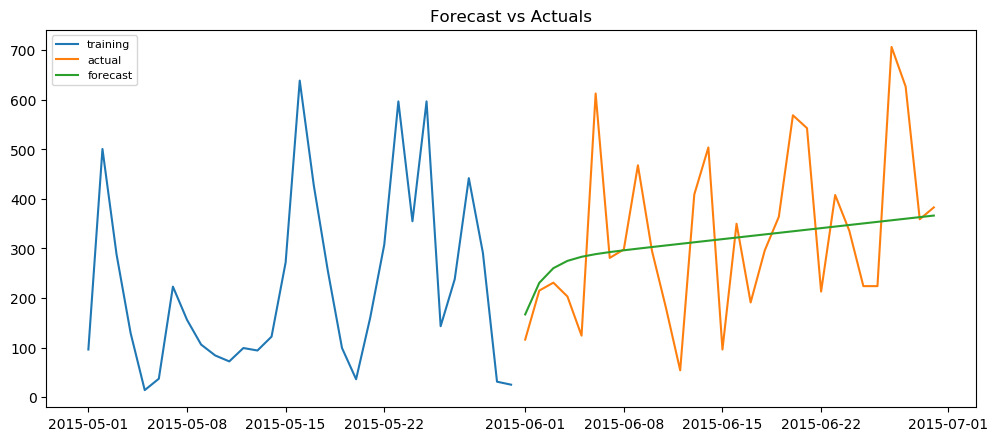

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=654.364, BIC=663.720, Fit time=1.004 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=678.658, BIC=682.400, Fit time=0.018 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=677.445, BIC=684.929, Fit time=0.546 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=654.917, BIC=662.402, Fit time=0.734 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=656.319, BIC=667.546, Fit time=1.516 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=665.776, BIC=673.261, Fit time=0.191 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=652.319, BIC=663.546, Fit time=0.944 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=662.4

In [74]:
#Auto Arima
def auto_arima(df):
    smodel = pm.auto_arima(df, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)



    print(smodel.summary())
    return smodel
# Create Training and Test
train = may_june_date[:31]
test = may_june_date[31:]
fc,fc_series = modelARIMA(train,test,1,1,1)
smodel = auto_arima(may_june_date)
#forecast_accuracy(fc.values, test.trip_id[None,:])

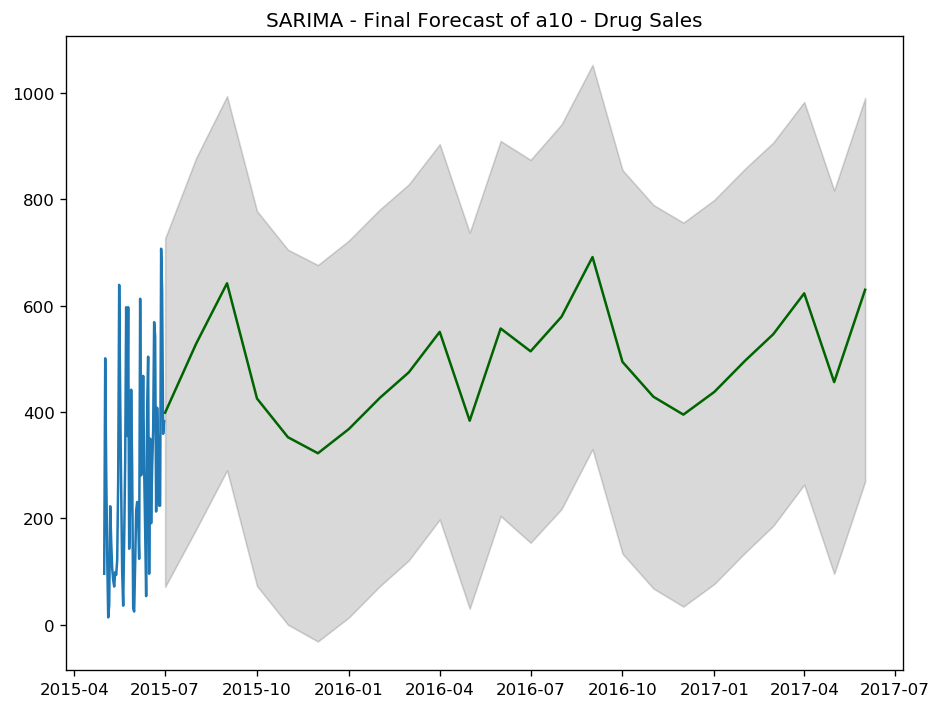

In [75]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(may_june_date.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
plt.plot(may_june_date)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of a10 - Drug Sales")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
width_in_inches = 2
height_in_inches = 2
dots_per_inch = 70

plt.figure(
    figsize=(width_in_inches, height_in_inches),
    dpi=dots_per_inch)

In [70]:
may_june_date.index[-1]

datetime.date(2015, 6, 30)

In [18]:
import numpy as np, pandas as pd
def plotdiff(df):
    #plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})



    # Original Series
    fig, axes = plt.subplots(3, 2, sharex=True)
    axes[0, 0].plot(df.checkout); axes[0, 0].set_title('Original Series')
    plot_acf(df.checkout, ax=axes[0, 1])

    # 1st Differencing
    axes[1, 0].plot(df.checkout.diff()); axes[1, 0].set_title('1st Order Differencing')
    plot_acf(df.checkout.diff().dropna(), ax=axes[1, 1])

    # 2nd Differencing
    axes[2, 0].plot(df.checkout.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
    plot_acf(df.checkout.diff().diff().dropna(), ax=axes[2, 1])

    plt.show()

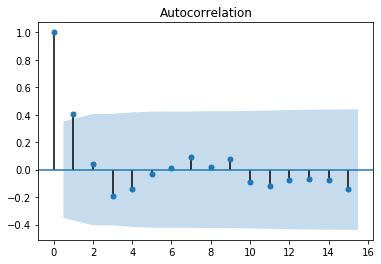

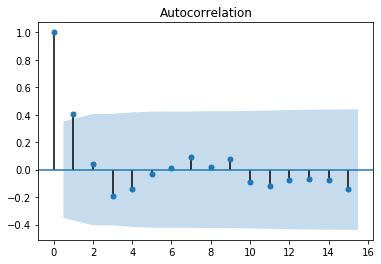

In [19]:
#plt.plot(may_2015_date.checkout)
plot_acf(may_2015_date.checkout)